Naveeda Ali 
<br>
Due date: Mar. 5, 2024, 11:59pm
<br>
PHYS 2030 W24


# <center><font color=#46769B>Homework assignment 7</font></center>

__Rubric (100 points total)__:

- Problem 1a - __20 points__

- Problem 1b - __30 points__
     
- Problem 2a - __30 points__

- Problem 2b - __20 points__

</font>

## <font color=#46769B>Introduction: Numerical methods for ODEs</font>

We will investigate the difference between __implicit__ and __explicit__ methods for solving ODEs. Specifically, we will compare the *forward* Euler method (explicit) and the *backward* Euler method (implicit).

Both methods are for solving __Initial Value Problems__ (IVPs). That is, you start with the initial value $y_0$ at an initial time $t_0$. Then you compute the values $y_1$, $y_2$, etc. at subsequent times $t_1$, $t_2$, etc. 

Explicit vs implicit methods differ in how one computes a subsequent step $y_{i+1}$ from the previous one $y_i$. For Euler's method, the two approaches are

$$y_{i+1} = \left\{ \begin{array}{ll} y_i + h \, f(t_i,y_i) & {\rm forward \; Euler}\\
y_i + h \, f(t_{i+1},y_{i+1}) & {\rm backward \; Euler} \end{array} \right.$$

The implicit method involves some extra steps to actually solve this algebraic equation to determine $y_{i+1}$ in terms of $y_i$. 

So what is point of implicit methods? Compared to explicit methods, implicit methods can be better behaved for larger step-sizes $h$ where explicit algorithms can blow-up. The situation arises for certain types of ODEs known as __stiff ODEs__. 

__Stiffness__ is characteristic of having different time scales in the problem. Coupled ODEs can involve varying time scales: some evolution can occur on short time scales, some on long time scales. For explicit methods, the step-size must be around the size of *smallest* time scale in the problem. Even if we are only interested in dynamics over longer time scales, we still need our algorithm to resolve down to the smallest time scales. Implicit methods, in contrast, are better behaved, giving reasonable results even if $h$ is larger than the smallest time-scales. 

In the limit that $h$ becomes small, both methods converge to yield the same solution.

Our goals for this notebook are:
- Gain experience with forward and backward Euler method.

- Gain familiarity with `scipy` functions: `scipy.integrate.solve_ivp` and `scipy.optimize.fsolve`

- Introduction to higher order methods


Required reading:
- *Lesson 7: Euler method*

- *Lesson 8: Higher-order methods*


## <font color=#46769B>Problem 1: Damped harmonic oscillator</font>

We consider a __damped simple harmonic oscillator__ with the second-order ODE

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \theta(t) = 0 \, , \qquad (1)$$

e.g., for a pendulum in the small-angle limit, $\theta \ll 1$. Here $\theta(t)$ is the displacement angle as a function of time $t$ and $\omega$ is the angular frequency. The term with $\gamma$ represents a damping force (e.g., the pendulum is submerged in water) and $\gamma$ is the damping constant. The effect of [damping](https://en.wikipedia.org/wiki/Damping) is that oscillatory motion will decay away and the pendulum will approach its equilibrium configuration. 

We will fix $\omega = 2\pi$ and $\gamma=100$. Since $\gamma \gg \omega$, this is an overdamped system. 
That is, the pendulum slowly decays to its equilibrium position without oscillations. In fact, the damping is so large that the system moves very slowly. In this limit, there is an approximate analytic solution

$$ \theta_{\rm approx}(t) = \theta_0 e^{-\omega^2 t/\gamma} \qquad (2) $$

where $\theta_0 = \theta(t_0)$ is the initial displacement.

### <font color=#46769B>Part (a)</font>

Perform the following tasks:

- Define a function `forward_Euler(num)` (using a `def` statement) that will perform the *forward* Euler method for solving Eq. (1) for $\theta(t)$ as a function of $t$, for $t$ in the range $[0,20]$, subject to the boundary conditions $\theta(0) = 0.1$ and $\theta'(0) = 0$. Here `num` represents $N$, the number of steps. Your function should end with a `return` statement like this:
```py
    return t, theta
```
returning arrays for *both* the times $t_i$ and values of $\theta_i$ at each of the $N+1$ times.

- Define a function `backward_Euler(num)` (using a `def` statement) that will perform the same task using the *backward* Euler method. 

- Using your defined functions, calculate numerical solutions for $\theta(t)$ for $N=1000$ steps for both forward and backward methods. Plot your results for $\theta$ as a function of time $t$. On the same plot, plot the (approximate) analytic solution $\theta_{\rm approx}$ in Eq. (2), and use `plt.yscale('log')` to make a log scale on the vertical axis. Include a legend and axes labels.

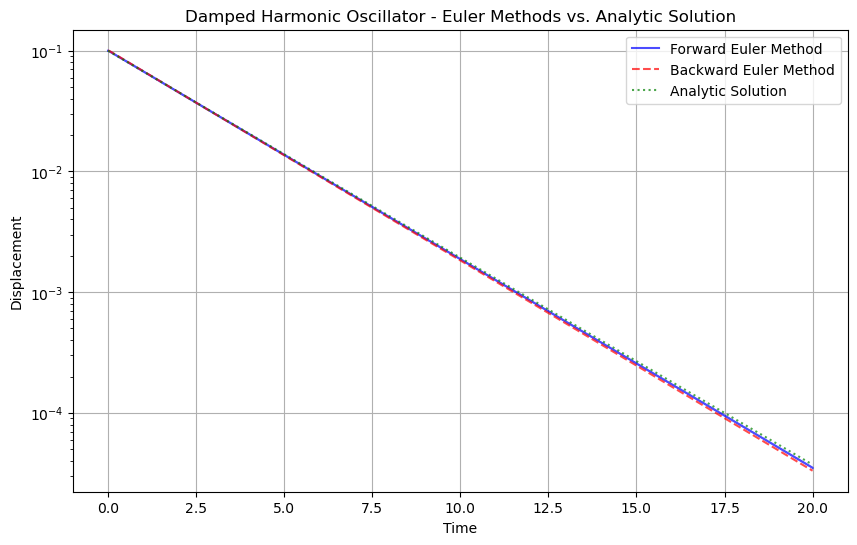

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

omega = 2 * np.pi  
gamma = 100  
theta0 = 0.1  
t0, tf = 0, 20 
num = 1000  

#Analytic solution
def theta_anal(t):
    return theta0 * np.exp(-omega**2 * t / gamma)

def f(t, y):
    theta, theta_prime = y
    return np.array([theta_prime, -gamma*theta_prime - omega**2*theta])

def forward_Euler(num_steps):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    theta = np.zeros((num_steps + 1, 2))
    theta[0] = np.array([theta0, 0])
    
    for i in range(num_steps):
        theta[i + 1] = theta[i] + h * f(t[i], theta[i])
        
    return t, theta

def backward_Euler(num_steps):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    theta = np.zeros((num_steps + 1, 2))
    theta[0] = np.array([theta0, 0])
    
    for i in range(num_steps):
        A = np.array([[1, h], [-omega**2*h/(1+h*gamma), 1/(1+h*gamma)]])
        theta[i+1] = A @ theta[i]
        
    return t, theta

#Generate solutions
t_forward, theta_forward = forward_Euler(num)
t_backward, theta_backward = backward_Euler(num)
t_analytic = np.linspace(t0, tf, 1000)
theta_analytic = theta_anal(t_analytic)


#Plot Euler methods and Analytic Solutions 
plt.figure(figsize=(10, 6))
plt.plot(t_forward, theta_forward[:,0], label='Forward Euler Method', linestyle='-', color='blue', alpha=0.7)
plt.plot(t_backward, theta_backward[:,0], label='Backward Euler Method', linestyle='--', color='red', alpha=0.7)
plt.plot(t_analytic, theta_anal(t_analytic), label='Analytic Solution', linestyle=':', color='green', alpha=0.7)

plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Damped Harmonic Oscillator - Euler Methods vs. Analytic Solution')
plt.legend()
plt.grid(True)
plt.show()


### <font color=#46769B>Part (b)</font>

This setup is a stiff system. The smallest intrinsic time scale in the problem is $\gamma^{-1} = 0.01$. However, as the analytic approximation makes clear, the pendulum is evolving on a time scale $(\omega^2/\gamma)^{-1} \approx 2.5$. Taking $N=1000$ steps above corresponded to $h=0.02$, which you should have found gave reasonable solutions for both forward and backward methods.

Now, perform the following tasks:

- Using your function above, make plots showing numerical solutions for $\theta(t)$ from the *forward Euler method* for $N=10$, $N=100$, and $N=900$ steps. Plot each separately.

- Using your function above, make plots showing numerical solutions for $\theta(t)$ from the *backward Euler method* for $N=10$, $N=100$, and $N=900$ steps. Plot them all together. Use a log scale for the $y$ axis.

You should find that the forward Euler method produces complete garbage results for the values of $N$ chosen. (Evidently a big improvement is made from going from $N=900$ to $N=1000$ steps.) But the backward Euler method does a better job even for a coarse step size. And as $N$ is increased further, both methods agree with each other and converge to the true result.


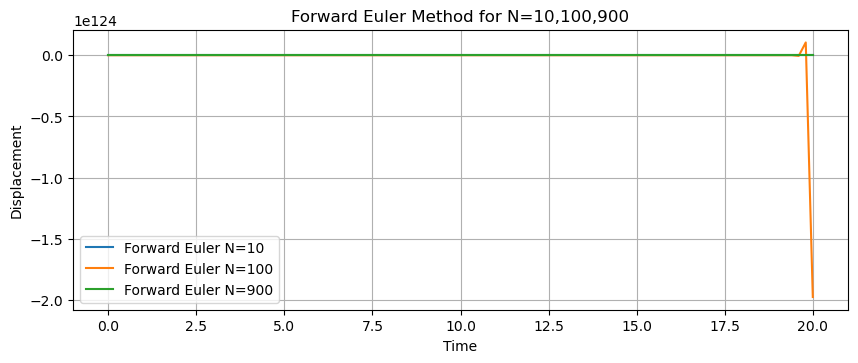

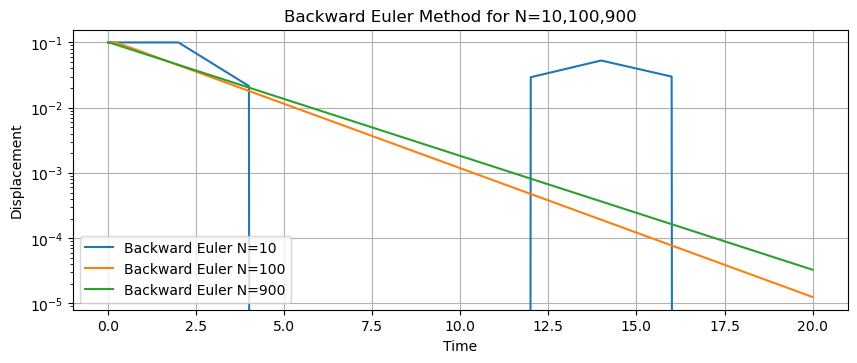

In [2]:
import numpy as np
import matplotlib.pyplot as plt

omega = 2 * np.pi 
gamma = 100  
theta0 = 0.1 
t0, tf = 0, 20 

def f(t, y):
    theta, theta_prime = y
    return np.array([theta_prime, -gamma*theta_prime - omega**2*theta])

def forward_Euler(num_steps):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    theta = np.zeros((num_steps + 1, 2))
    theta[0] = np.array([theta0, 0])
    
    for i in range(num_steps):
        theta[i + 1] = theta[i] + h * f(t[i], theta[i])
        
    return t, theta[:, 0]

def backward_Euler(num_steps):
    t = np.linspace(t0, tf, num_steps + 1)
    h = (tf - t0) / num_steps
    theta = np.zeros((num_steps + 1, 2))
    theta[0] = np.array([theta0, 0])
    
    for i in range(num_steps):
        A = np.array([[1, h], [-omega**2*h/ (1+h*gamma), 1/ (1+h*gamma)]])
        theta[i+1] = A @ theta[i]
        
    return t, theta[:,0]

#Forward Euler Plots for N=10,100,900
plt.figure(figsize=(10, 8))
for N in [10, 100, 900]:
    t_f, theta_f = forward_Euler(N)
    plt.subplot(2, 1, 1)
    plt.plot(t_f, theta_f, label=f'Forward Euler N={N}')

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Forward Euler Method for N=10,100,900')
plt.legend()
plt.grid(True)
plt.show()


#Backward Euler plots for N=10,100,900
plt.figure(figsize=(10, 8))
for N in [10, 100, 900]:
    t_b, theta_b = backward_Euler(N)
    plt.subplot(2, 1, 2)
    plt.plot(t_b, theta_b, label=f'Backward Euler N={N}')
    
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Backward Euler Method for N=10,100,900')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


## <font color=#46769B>Problem 2: Damped driven pendulum</font>

### <font color=#46769B>Introduction</font>

We consider a __damped driven pendulum__, governed by the second-order ODE

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin \theta(t) = S(t) \, , \qquad (1)$$

where $\theta(t)$ is the displacement angle (with respect to the vertical axis) as a function of time $t$, $\omega$ is the angular frequency, and $\gamma$ is the damping constant. 

Here, on the right hand side, we have a __source term__ or __driving force__ $S(t)$ applied to the pendulum. This is a known function. For example, suppose your setup exerts a torque on the pendulum arm, or pushes the pendulum mass with a magnet, as a function of time.

Now, we want to solve an IVP for Eq. (1), given some initial conditions $\theta(t_0)$ and $\theta^\prime(t_0)$. The general setup is to define $y_1(t) = \theta(t)$ and $y_2(t) = \theta^\prime(t)$ and put both functions in a vector

$$\mathbf{y}(t) = \left( \begin{array}{c} y_1(t) \\ y_2(t) \end{array} \right)$$

and to rewrite Eq. (1) as a system of first order equations

$$\mathbf{y}^\prime = \mathbf{f}(t,\mathbf y) \, .$$

Let's write everything out to be explicit:

$$\left( \begin{array}{c} y_1^\prime \\ y_2^\prime \end{array} \right) = \left( \begin{array}{c} y_2 \\
- \omega^2 \sin(y_1) -\gamma y_2 + S(t) \end{array} \right)$$

where the stuff on the right-hand-side is $\mathbf{f}(t,\mathbf y)$. Compared to previous exercises, we just have an extra term involving the source term, which *explicitly depends on $t$*.

### <font color=#46769B>Part (a)</font>

Consider the pendulum described in Eq. (1) with $\omega = 2$, $\gamma = 0.3$, and source term defined by

$$S(t) = \left\{ \begin{array}{cc} S_0 & {\rm for} \; 0 \le t \le 1 \\ 0 & {\rm otherwise} \end{array} \right.$$

where $S_0$ is a constant (defined below) and with initial condition at $t_0 = 0$ such that the pendulum is at rest

$$\theta(0) = \theta^\prime(0) =  0 \, .$$

Perform the following tasks:

- Using `scipy.integrate.solve_ivp`, solve the IVP described above for the range $[0,30]$ with $S_0 = 5$. When you use `solve_ivp`, set the keyword `t_eval = np.linspace(0,30,num=1000)` so that the solver will return a suitable number of time steps for your solution.

- Plot $\theta(t)$ and $\theta^\prime(t)$ on the same plot. Include a legend and a label for your $x$-axis.

- Repeat the above tasks for $S_0 = 5.5$ (and other inputs the same). You should notice that your solution does not damp back to $\theta(t) = 0$ as $t$ becomes large. Why is that?


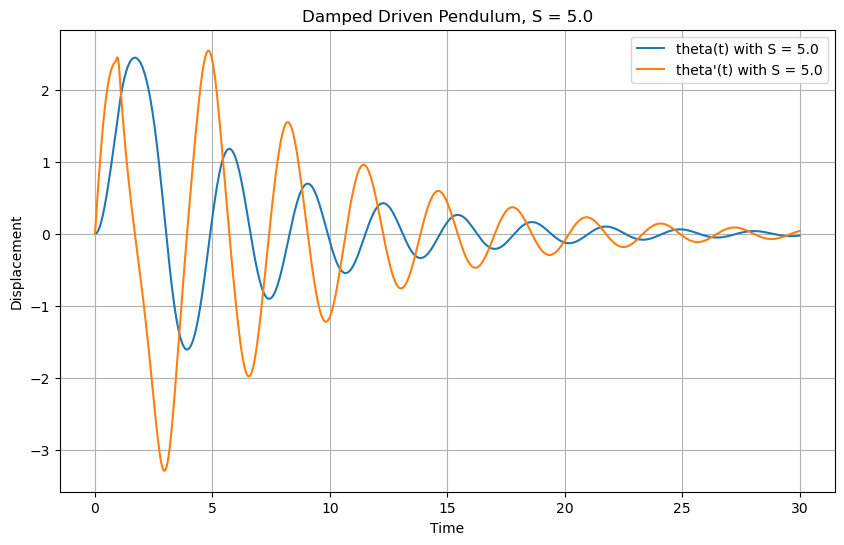

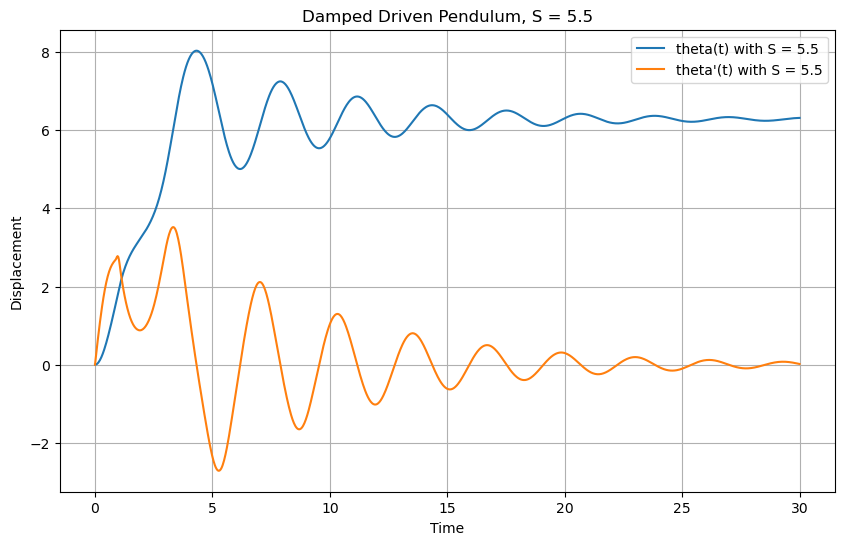

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Constants
omega = 2.0
gamma = 0.3
t0, tf = 0, 30  
theta0 = [0, 0]  

#Source Term S(t)
def s(t, s0):
    if 0<= t and t<= 1:
        return s0
    else:
        return 0
    
def f(t, y, s0):
    theta, theta_prime = y
    return [theta_prime, -omega**2 * np.sin(theta) - gamma*theta_prime + s(t, s0)]

#Time steps to evaluate 
t_eval = np.linspace(t0, tf, num=1000)

#Solve the IVP with S = 5.0
sol1 = solve_ivp(f, [t0, tf], theta0, t_eval=t_eval, args=(5.0,))

#Solve the IVP with S = 5.5
sol2 = solve_ivp(f, [t0, tf], theta0, t_eval=t_eval, args=(5.5,))

#Plot theta(t) and theta'(t) for S0 = 5.0
plt.figure(figsize=(10, 6))
plt.plot(sol1.t, sol1.y[0], label="theta(t) with S = 5.0")
plt.plot(sol1.t, sol1.y[1], label="theta'(t) with S = 5.0")

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title("Damped Driven Pendulum, S = 5.0")
plt.legend()
plt.grid(True)
plt.show()

#Plot theta(t) and theta'(t) for S0 = 5.5 
plt.figure(figsize=(10, 6))
plt.plot(sol2.t, sol2.y[0], label="theta(t) with S = 5.5")
plt.plot(sol2.t, sol2.y[1], label="theta'(t) with S = 5.5")

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title("Damped Driven Pendulum, S = 5.5")
plt.legend()
plt.grid(True)
plt.show()



### <font color=#46769B>Part (b)</font>

Your goal here is to repeat Part (a) using the *backward Euler method*. 

Using an implicit method is complicated because the system of algebraic equations we need to solve at each step cannot be done analytically. Therefore, at each step, we have to solve a system of equations numerically to figure out $y_{i+1}$ from $y_i$. This is the more realistic situation one encounters for implicit methods, so it is worthwhile to see how this works.

At each time step, the system of equations we need to solve is

$$\mathbf{y}_{i+1} = \mathbf{y}_{i} + h \mathbf{f}(t_{i+1},\mathbf y_{i+1})$$

where

$$\mathbf{f}(t,\mathbf y) = \left( \begin{array}{c} y_2 \\ - \omega^2 \sin(y_1) -\gamma y_2 + S(t) \end{array} \right) \, .$$

We are now going to learn how to use a built-in function `scipy.optimize.fsolve` to solve this equation numerically. `fsolve` is a root-finding method: it solves an equation of the form $F(x) = 0$ for $x$, given some initial guess $x_0$. (If there are multiple solutions, it typically finds the one closest to $x_0$.) It also works for *system of equations* $\mathbf{F}(\mathbf x) = 0$. (Documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).)

The first step is to define a function

$$ \mathbf{F}(\mathbf y_{i+1}) = \mathbf{y}_{i+1} - \mathbf{y}_{i} - h \mathbf{f}(t_{i+1},\mathbf y_{i+1}) \, .$$

That is, we want to find where $\mathbf{F}(\mathbf y_{i+1}) = 0$. 

Next, we use the syntax `fsolve(F,yi)`:
- The first argument `F` is the function we want to solve for where it is zero.
- The second argument `yi` is the initial guess for where it is zero. We will take the *previous* value $\mathbf{y}_i$ as our guess for $\mathbf{y}_{i+1}$.
- `fsolve(F,yi)` will return the solution, which is $\mathbf{y}_{i+1}$.

So, let's see what all this would look like in your code. First, you need to import `fsolve` at the top of your code:
```py
from scipy.optimize import fsolve
```

Next, here is the code for iterating through your steps and updating $\mathbf{y}_{i+1}$ from $\mathbf{y}_i$:
```py

for i in range(num_steps):

    yi = y[i]
    ti = t[i]
    
    t_new = t[i+1]
    
    def F(y_new):
        return y_new - yi - h*f(t_new,y_new)
    
    y[i+1] = fsolve(F,yi)    
    
```

Ok, given all this, your tasks are:
- Repeat Part (a) using the backward Euler method described above, with $N=10^4$ steps.
- When making your plots, include your results from Part (a) on the same plots.

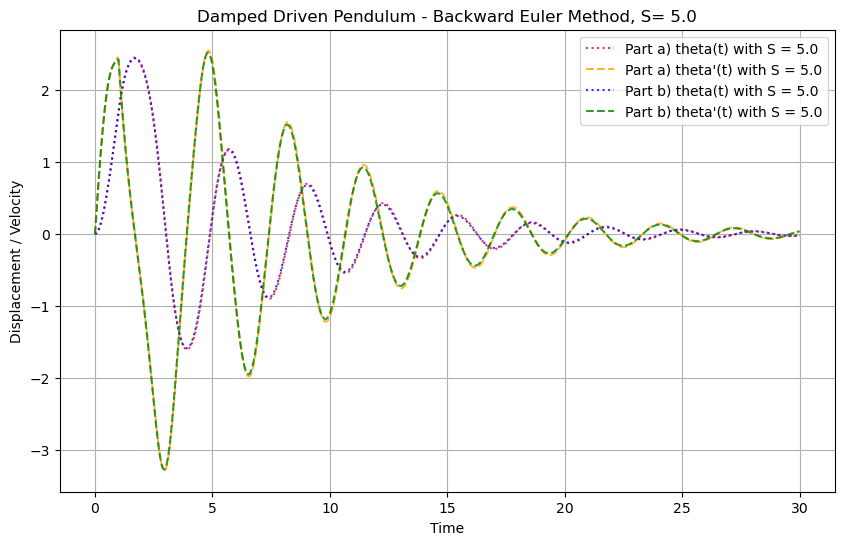

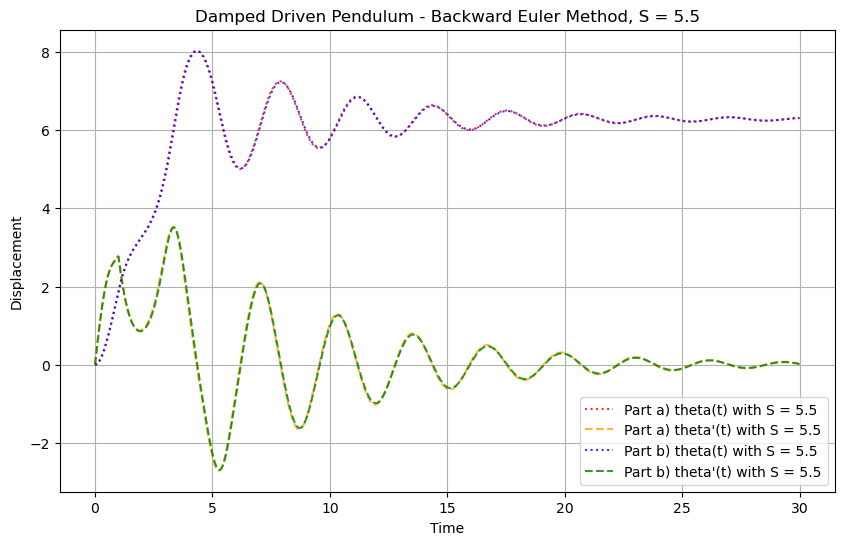

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#Constants
omega = 2.0  
gamma = 0.3 
S1 = 5.0 
S2 = 5.5 
t0, tf = 0, 30  
theta0 = [0, 0]  
num = 10**4  

#Source Term S(t)
def s(t, s0):
    if 0<= t and t<= 1:
        return s0
    else:
        return 0

def f(t, y, s0):
    theta, theta_prime = y
    return np.array([theta_prime, -omega**2 *np.sin(theta)-gamma * theta_prime + s(t, s0)])

#Backward Euler method with fsolve
def backward_Euler(num_steps, s0):
    t = np.linspace(t0, tf, num_steps + 1)
    theta = np.zeros((num_steps + 1, 2))
    theta[0] = theta0 
    h = (tf - t0) / num_steps

    for i in range(num_steps):
        def F(theta_new):
            t_new = t[i+1]
            return theta_new - theta[i] - h * f(t_new, theta_new, s0)

        theta[i+1] = fsolve(F, theta[i])

    return t, theta[:, 0], theta[:, 1]  

#Solve Backward Euler for S= 5,5.5
t_backward, theta_backward, theta_prime_backward = backward_Euler(num, S1)
t2_backward, theta2_backward, theta2_prime_backward = backward_Euler(num, S2)


#Plot Backward Euler Method, S= 5.0
plt.figure(figsize=(10, 6))
#Part a) results
plt.plot(sol1.t, sol1.y[0], label="Part a) theta(t) with S = 5.0", color = 'red',alpha=0.8, linestyle=":")
plt.plot(sol1.t, sol1.y[1], label="Part a) theta'(t) with S = 5.0", color = 'orange', linestyle='--',alpha=0.8)
#Part b) results
plt.plot(t_backward, theta_backward, label='Part b) theta(t) with S = 5.0', color='blue',alpha=0.8,linestyle=':')
plt.plot(t_backward, theta_prime_backward, label="Part b) theta'(t) with S = 5.0", color='green', linestyle='--',alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Displacement / Velocity')
plt.title('Damped Driven Pendulum - Backward Euler Method, S= 5.0')
plt.legend()
plt.grid(True)
plt.show()

#Plot Backward Euler Method, S= 5.0
plt.figure(figsize=(10, 6))
#Part a) results
plt.plot(sol2.t, sol2.y[0], label="Part a) theta(t) with S = 5.5", color= 'red', alpha=0.8, linestyle=":")
plt.plot(sol2.t, sol2.y[1], label="Part a) theta'(t) with S = 5.5", color= 'orange', linestyle='--', alpha=0.8)
#Part b) results
plt.plot(t2_backward, theta2_backward, label='Part b) theta(t) with S = 5.5 ', color='blue', alpha=0.8, linestyle=":")
plt.plot(t2_backward, theta2_prime_backward, label="Part b) theta'(t) with S = 5.5", color='green', linestyle='--',alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Damped Driven Pendulum - Backward Euler Method, S = 5.5')
plt.legend()
plt.grid(True)
plt.show()